# Environment

In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
customer_df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# EDA

## Fast look

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [6]:
# date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [7]:
# Check nulls
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [8]:
# Weird no nulls, check data

In [9]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
# Income variable first quartil == min, probably fillna(0)

In [11]:
# Check discrete and continuous variables

In [12]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [13]:
# Can be implemented as a function for p = percentage 
# of unique rows for which a column is discrete

def function(a):
    """
    docstring
    """
    return a

# int check is an optional approach, for automation
# might be useless

# DISCLAIMER:
# Only numerical variables can be discrete or continuous, 
# in this case we have no continuous variables, but we 
# will call the variables which are not bounded continuous anyway




discrete = [i for i in numericals if (numericals[i].all() == numericals[i].apply(int).all()) \
                 & (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

continuous = list(numericals.drop(columns = discrete).columns)

In [14]:
print(discrete)

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']


In [15]:
print(continuous)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']


In [16]:
# the categorical values that are not text or IDs

In [17]:
# we will declare categorical variables with few unique
# as just categorical. if we found some with a lot of 
# unique values we would call them text.

categorical = customer_df.select_dtypes(object)

In [18]:
categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]

In [19]:
# Check misspelling errors
for i in categorical[categorical_columns]:
    if (categorical[i].value_counts() < categorical.shape[0] * 0.01).any():
        print(i,":", categorical[i].value_counts()[categorical[i].value_counts() < categorical.shape[0] * 0.01])

policy : Special L1    66
Name: policy, dtype: int64


In [20]:
print(categorical["policy"].value_counts())
#No errors

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64


In [21]:
# we will drop id later on
categorical.drop(columns = categorical_columns)

,customer
0,BU79786
1,QZ44356
2,AI49188
3,WW63253
4,HB64268
...,...
9129,LA72316
9130,PK87824
9131,TD14365
9132,UP19263


In [22]:
categorical_df = categorical.drop(columns = "customer")

## Numerical

In [23]:
#create variables continuous_df and discrete_df
continuous_df = numericals.drop(columns = discrete)
discrete_df = numericals[discrete]

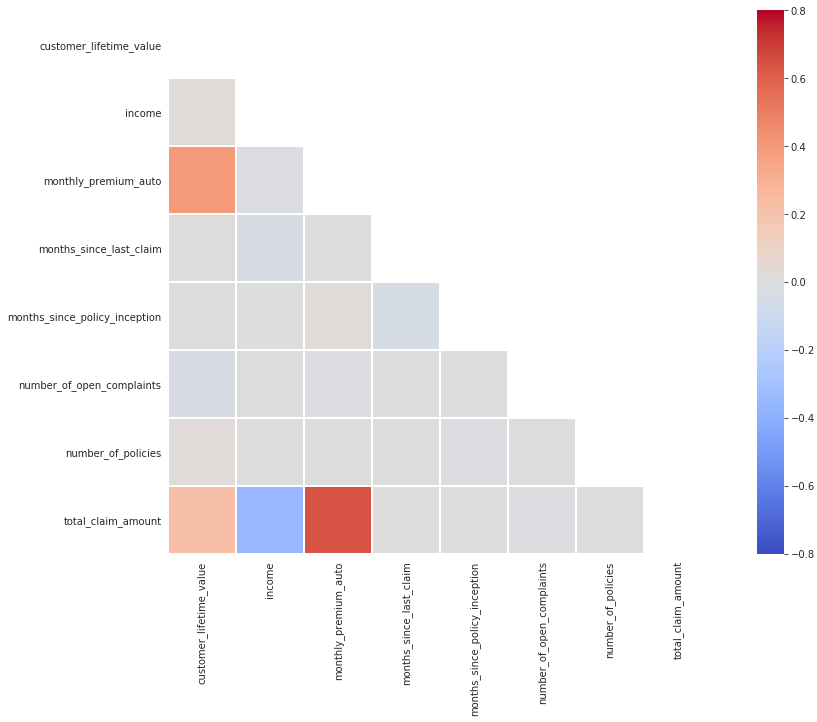

In [24]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [25]:
# We can see income and months since
# policy inception are somewhat related

### Discrete

In [26]:
# Create function to print barplots from discrete data

def df_bar(df):
    """
    Docs
    """
    sns.set(rc={'figure.figsize':(16,8)})
    
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

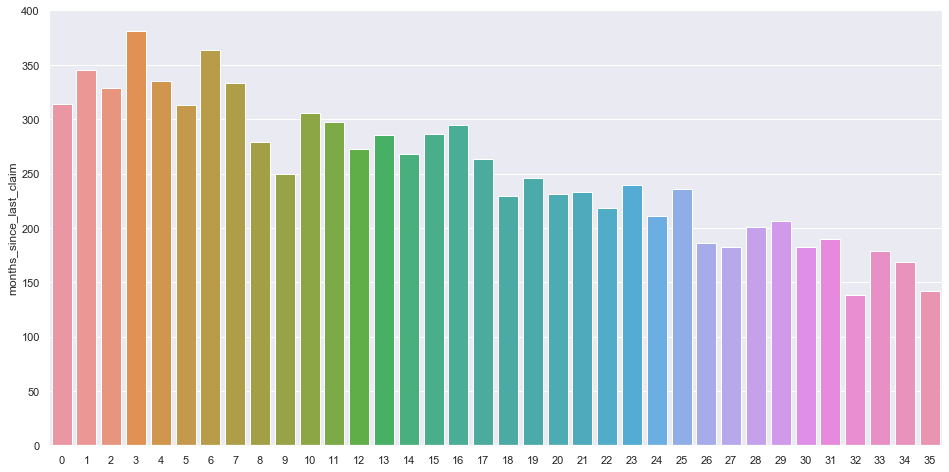

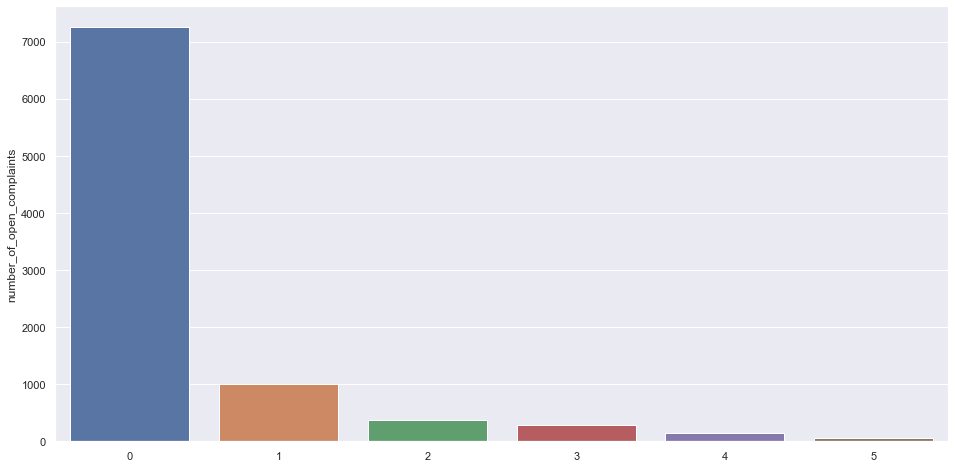

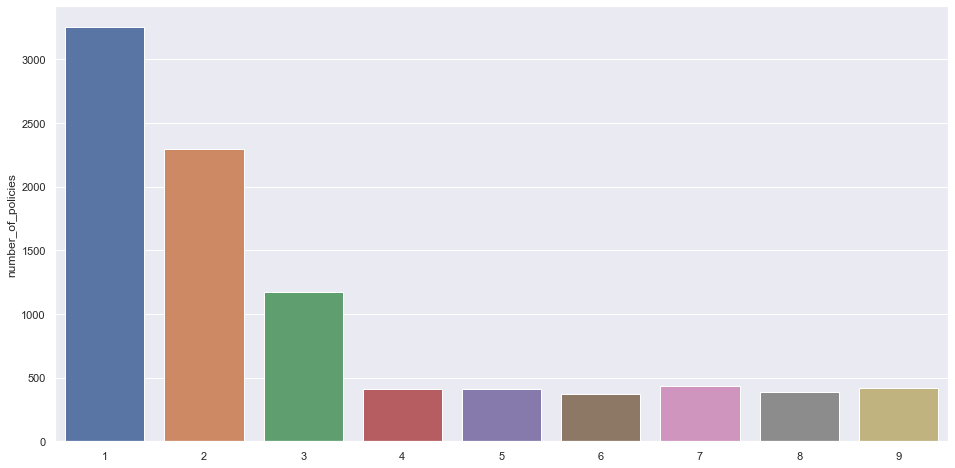

In [27]:
df_bar(discrete_df)

### Continuous

In [28]:
def df_hist(df):
    """
    docs
    """
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

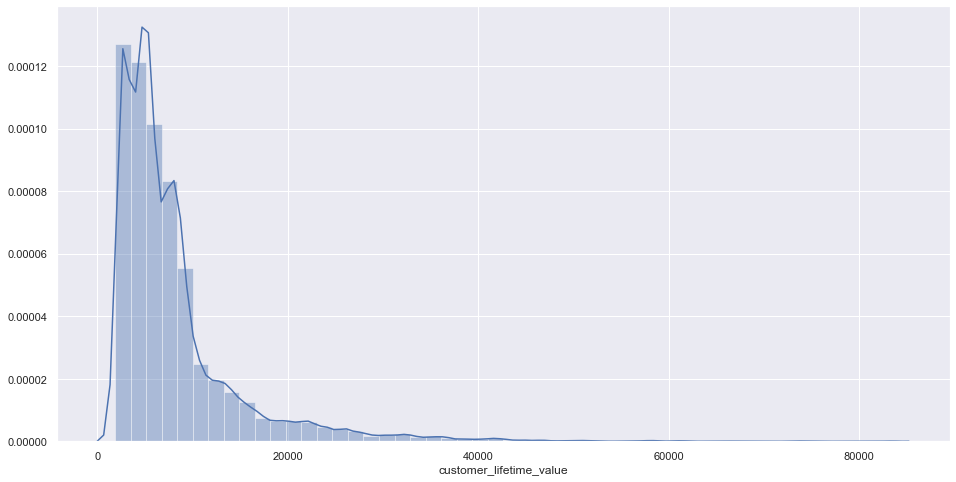

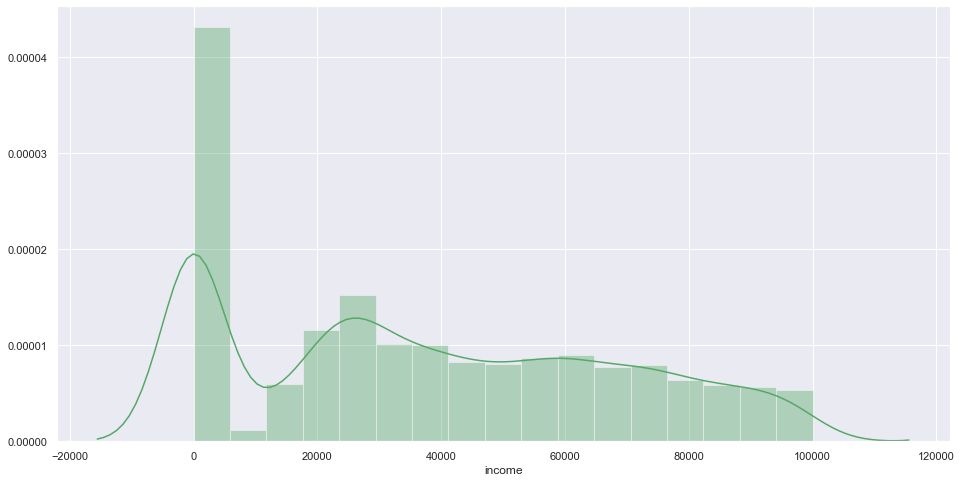

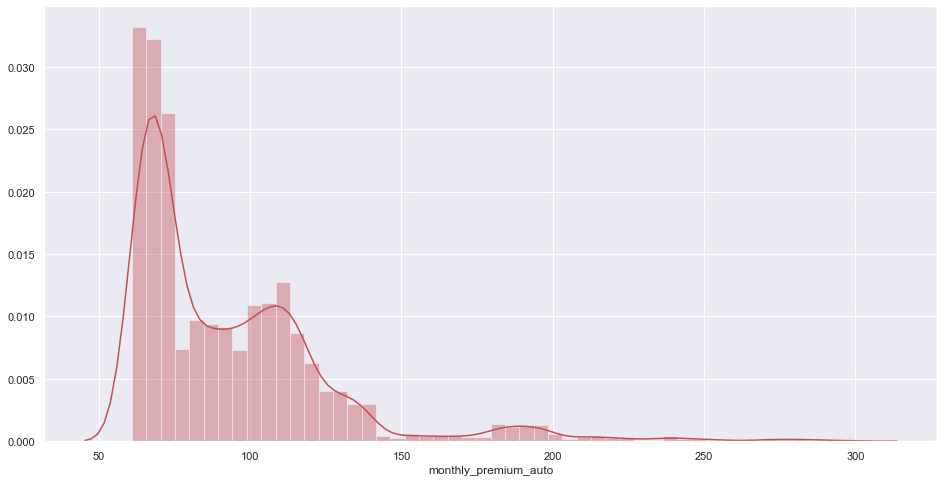

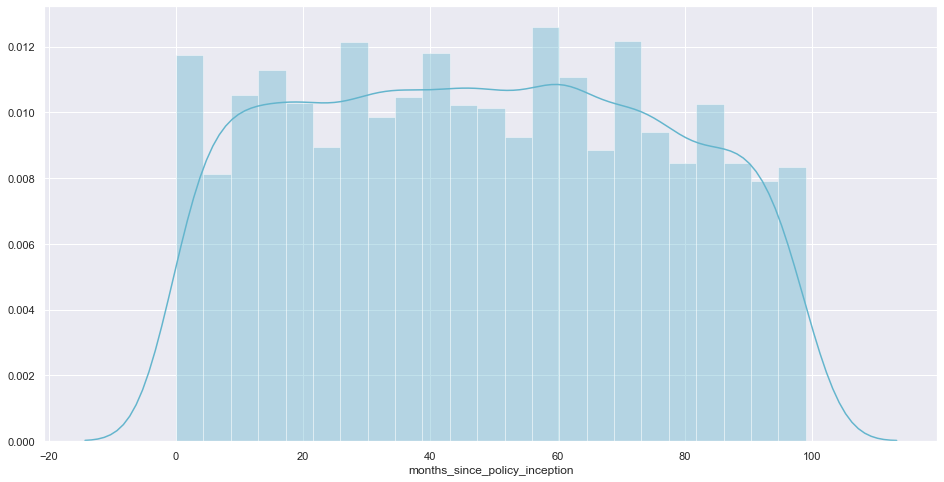

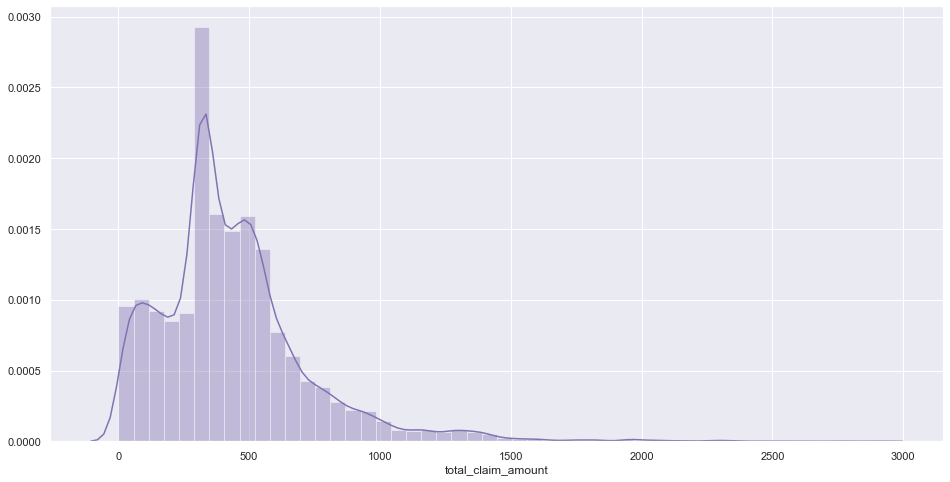

In [29]:
df_hist(continuous_df)

In [30]:
# Only total claim amount (target), income and customer 
# lifetime look like continous variables. better 
#check more in depth what's happening there:

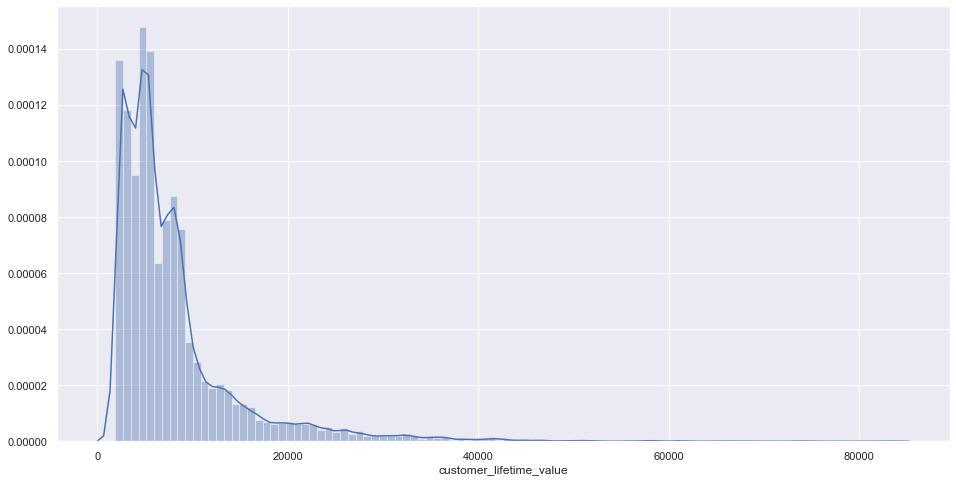

In [31]:
sns.distplot(continuous_df["customer_lifetime_value"], bins = 100);

In [32]:
continuous_df["customer_lifetime_value"].value_counts()

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

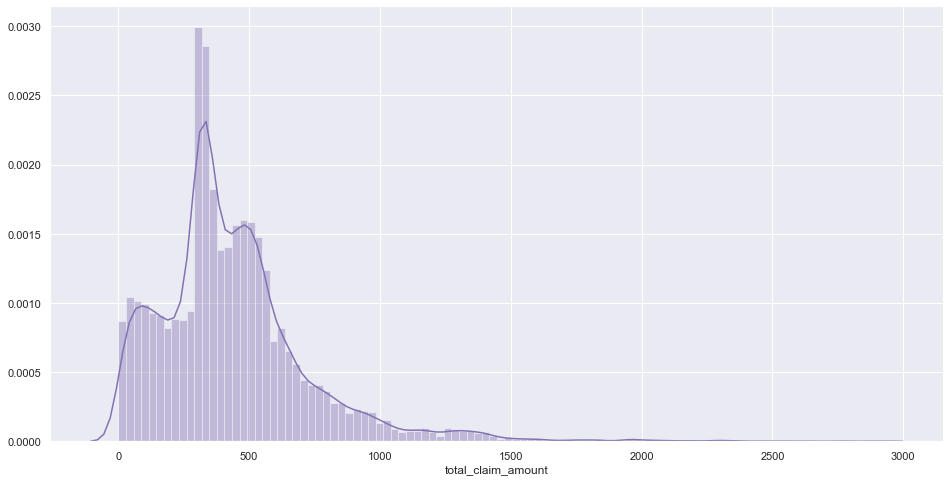

In [33]:
sns.distplot(continuous_df["total_claim_amount"], bins = 100, color = list(BASE_COLORS.keys())[4]);

In [34]:
continuous_df["total_claim_amount"].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
212.009825      1
314.880326      1
707.925645      1
246.993145      1
204.620759      1
Name: total_claim_amount, Length: 5106, dtype: int64

In [35]:
# Distribution looks fine, probably no nans were replaced.

In [36]:
continuous[:3]

['customer_lifetime_value', 'income', 'monthly_premium_auto']

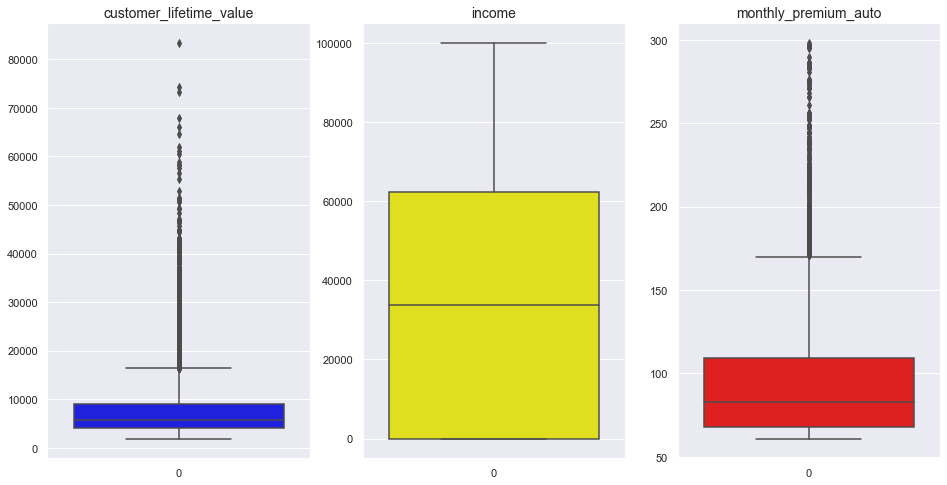

In [37]:
box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

In [38]:
# Serious outliers in customer lifetime vaulue and monthly_premium_auto

## Categorical

In [39]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


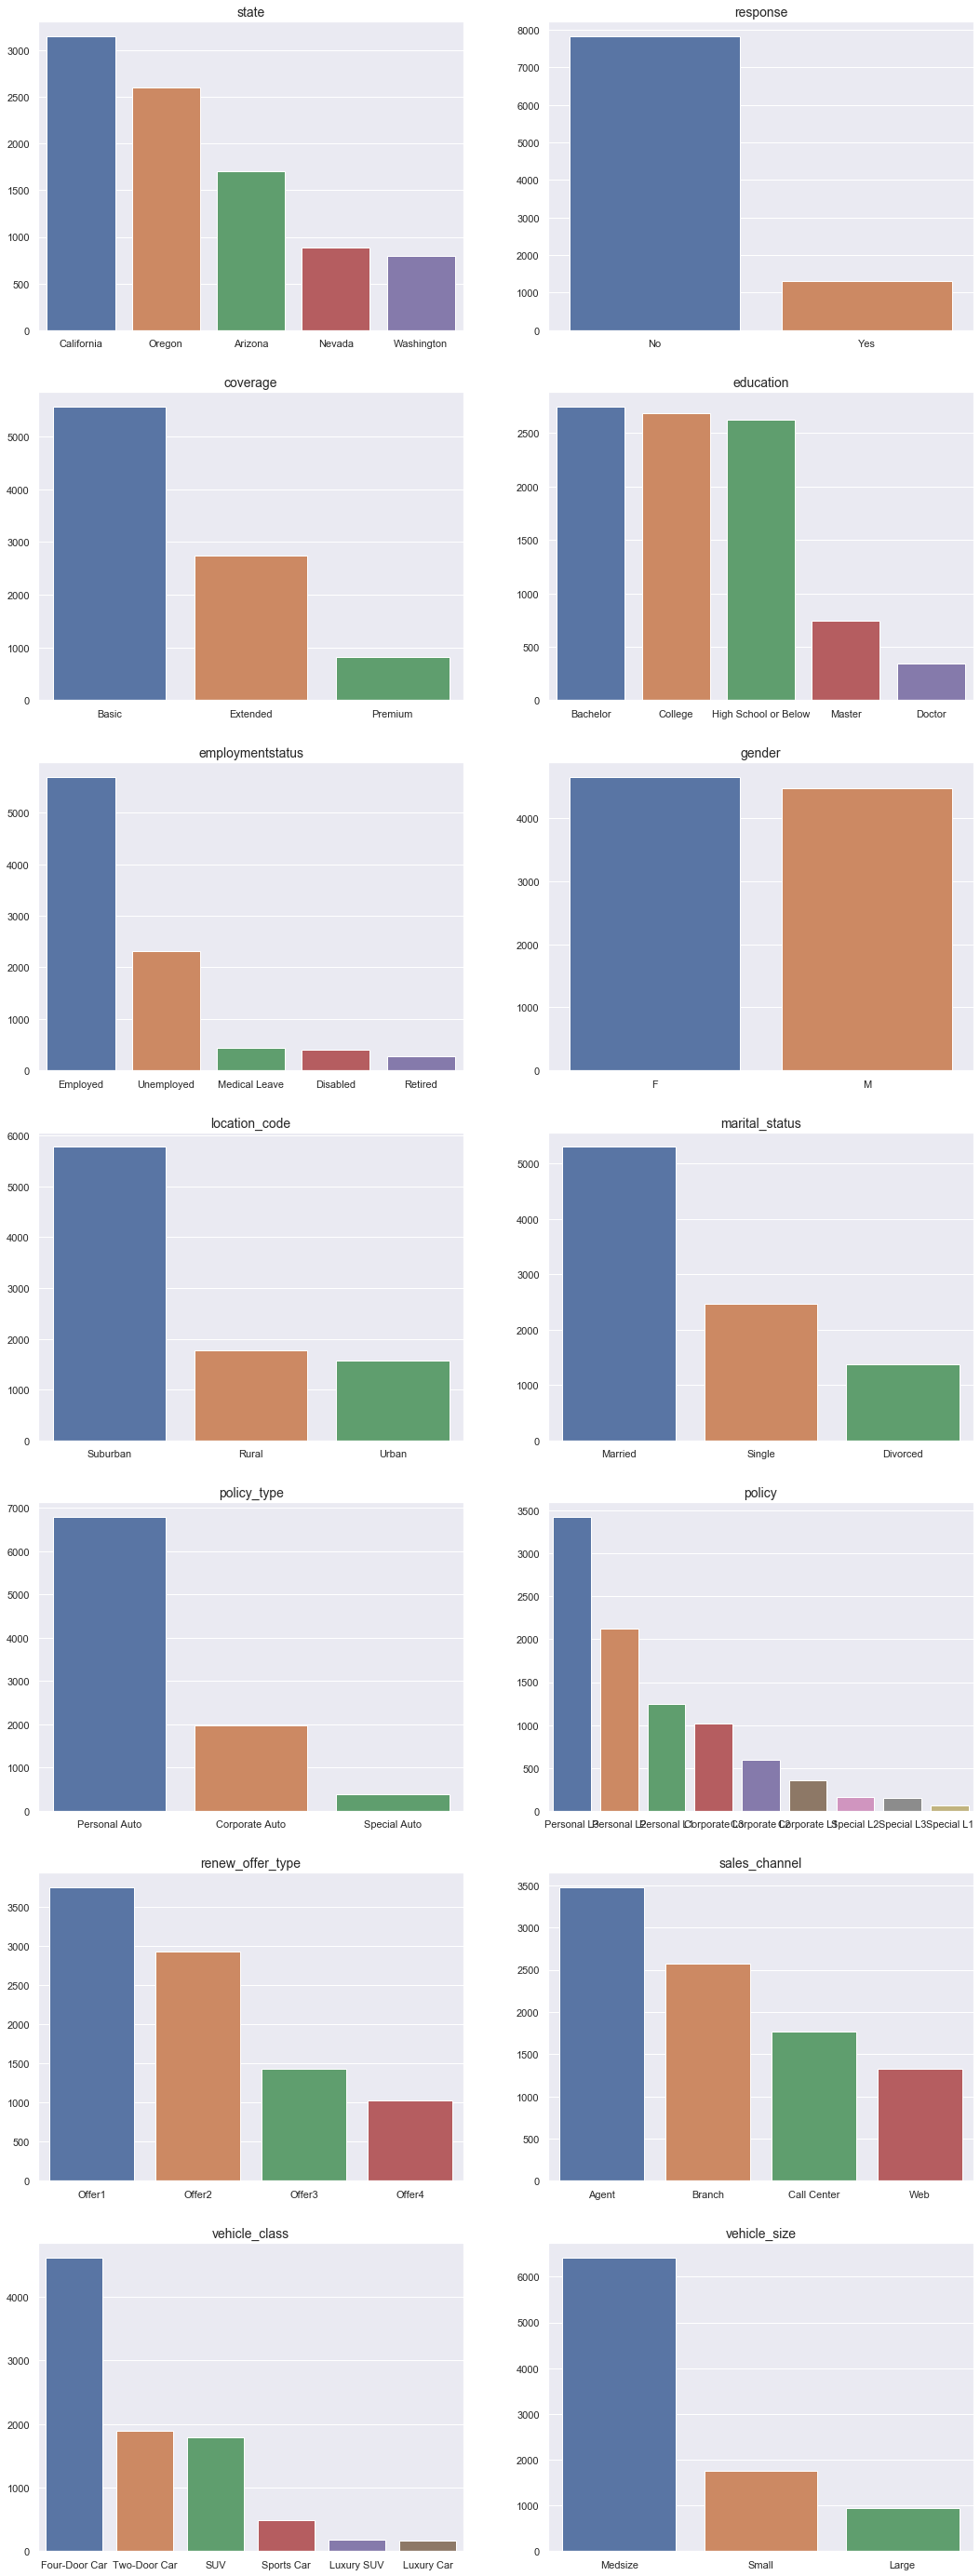

In [40]:
f, axes = plt.subplots(int(categorical_df.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categorical_df):

    sns.barplot(x = categorical_df[col].value_counts().index,
                y = categorical_df[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

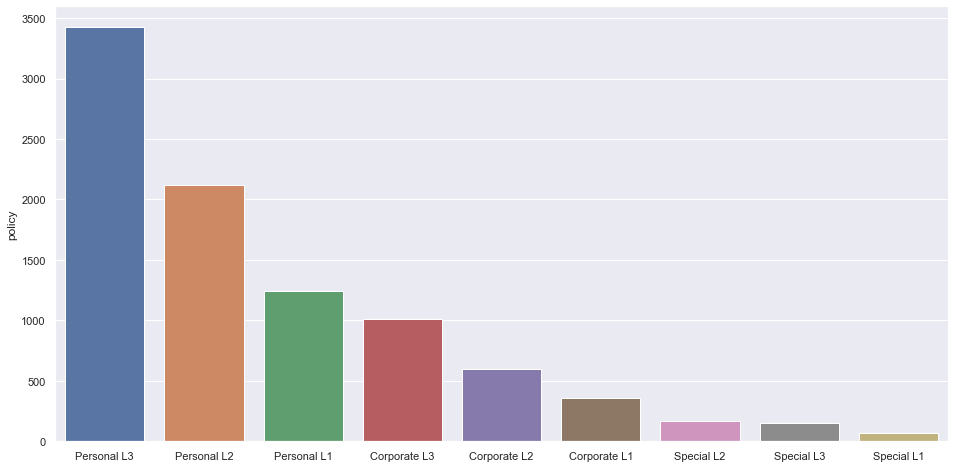

In [41]:
sns.barplot(x = categorical_df["policy"].value_counts().index, y = categorical_df["policy"].value_counts());

In [42]:
# Conclusions:

# Education, employment status, policy and vehicle class are somewhat unbalanced.
# For education we could turn it into a binary variable (college +-), but i wouldnt touch it.
# Policy is redundant, may be we can classify it in L1, L2 and L3 groups
# Id concatenate luxury suv, sports car and luxury car into luxury or among the other classes
# For employment we could divide them among employed, unemployed and inactive
# We can see that having open complains isnt that common
# so we can turn it into a binary variable, open not open
# For the number of policies we could join use 1, 2, 3, 4+

In [43]:
# Check policy 
L = categorical["policy"].apply(lambda x: x[-2:])
policy = categorical["policy"].apply(lambda x: x[:-2])

In [44]:
# L looks like an independent variable
L.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [45]:
categorical["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [46]:
categorical["marital_status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [47]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

In [48]:
categorical["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [49]:
# As we thought at first this was kind of 
# redundant, we will have to deal with it later on

## Time (Bonus Challenge)

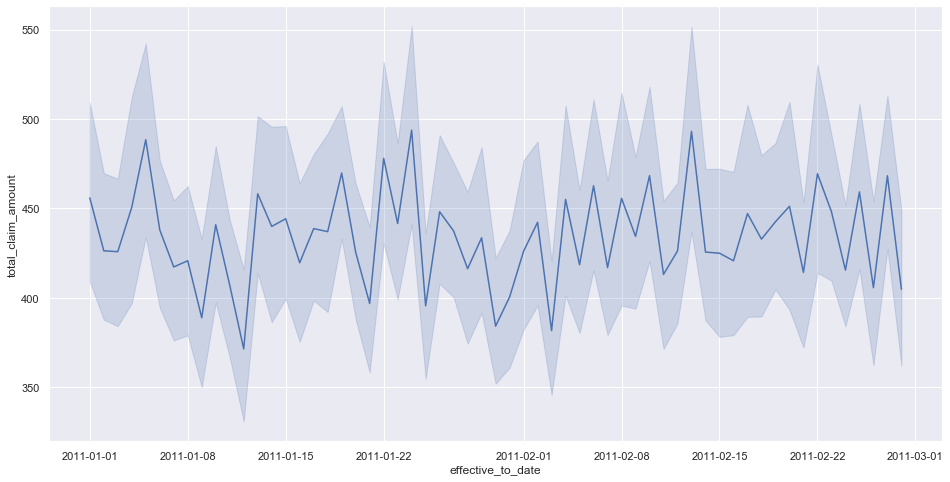

In [50]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = customer_df);

In [51]:
# Cant see clear pattern

In [52]:
time_df = pd.DataFrame()
time_df["day"] = customer_df["effective_to_date"].dt.day
time_df["week"] = customer_df["effective_to_date"].dt.week
time_df["month"] = customer_df["effective_to_date"].dt.month
time_df["target"] = customer_df["total_claim_amount"]

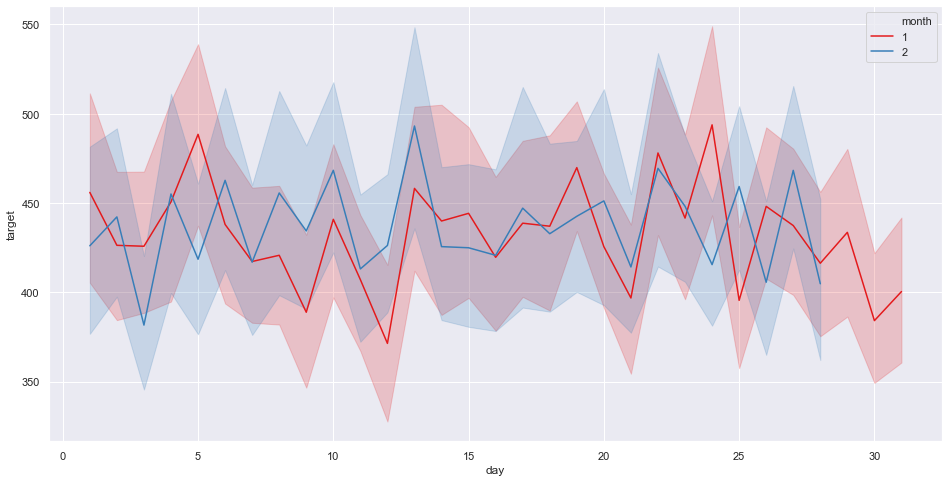

In [53]:
sns.lineplot(x = time_df.day, y=time_df.target, hue = time_df.month, palette="Set1");

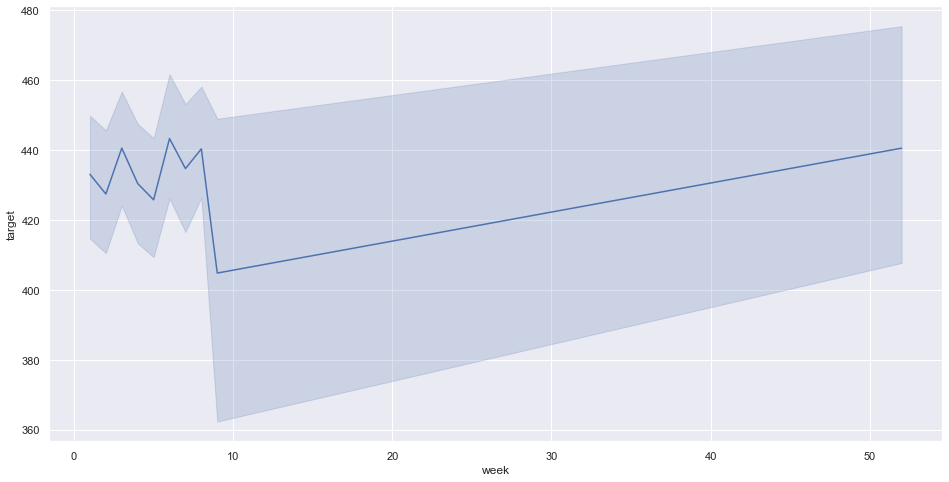

In [54]:
# Still not clear, check weeks
sns.lineplot(x = time_df.week, y = time_df.target);

In [55]:
# Error here
time_df.week.value_counts()

4     1147
3     1137
5     1105
2     1079
8     1073
1     1049
7     1040
6     1035
52     308
9      161
Name: week, dtype: int64

In [56]:
# Looks like first week
customer_df.effective_to_date.loc[customer_df.effective_to_date.dt.week[customer_df.effective_to_date.dt.week == 52].index]

47     2011-01-02
60     2011-01-02
87     2011-01-01
133    2011-01-02
205    2011-01-02
          ...    
9041   2011-01-02
9063   2011-01-01
9085   2011-01-01
9091   2011-01-02
9103   2011-01-01
Name: effective_to_date, Length: 308, dtype: datetime64[ns]

In [57]:
# Yes it is, change 52 to 0
customer_df.effective_to_date.loc[customer_df.effective_to_date.dt.week[customer_df.effective_to_date.dt.week == 1].index]

11     2011-01-06
17     2011-01-05
36     2011-01-08
69     2011-01-09
106    2011-01-04
          ...    
9090   2011-01-07
9104   2011-01-09
9113   2011-01-06
9126   2011-01-09
9128   2011-01-06
Name: effective_to_date, Length: 1049, dtype: datetime64[ns]

In [58]:
time_df.week = time_df.week.apply(lambda x: 0 if x == 52 else x)

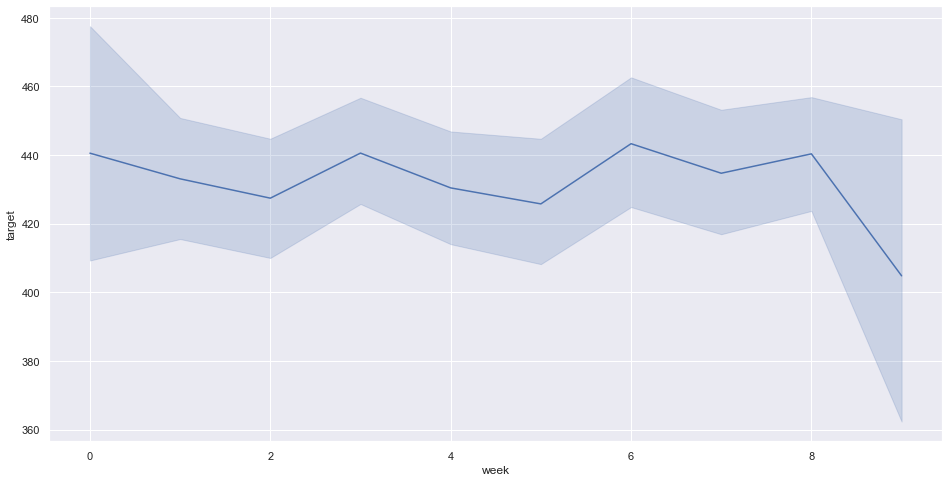

In [59]:
sns.lineplot(x = time_df.week, y = time_df.target);

In [60]:
# Much better
# Isnt very clear if it's relevant but will keep it 

# Data cleaning

In [61]:
# No NaNs so just remove outliers (normalization method)
def outliers(column, threshold = 3):
    """
    docs
    """
    
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [62]:
CLV_outliers = outliers(customer_df["customer_lifetime_value"])
MPA_outliers = outliers(customer_df["monthly_premium_auto"])

In [63]:
to_drop = CLV_outliers.index | MPA_outliers.index # Union

In [64]:
clean_customer_df = customer_df.drop(to_drop).reset_index(drop = True)
clean_customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8749,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8750,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8751,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


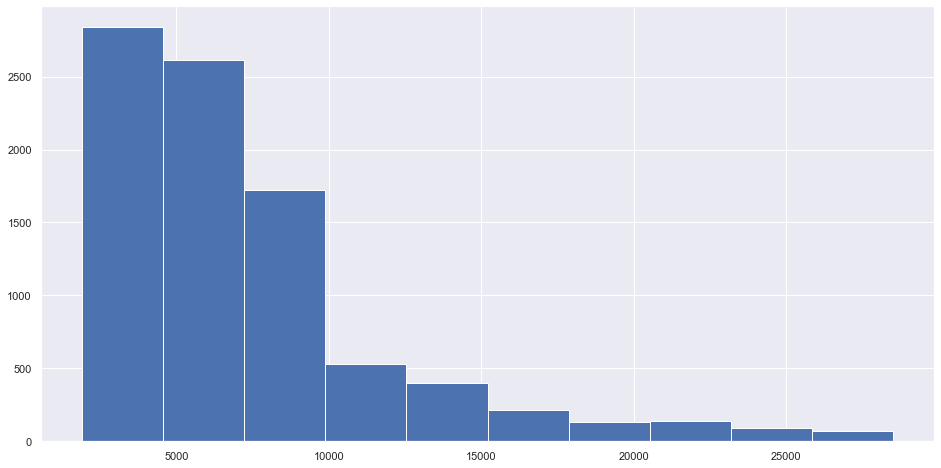

In [65]:
# Much better
clean_customer_df["customer_lifetime_value"].hist();

# Data wrangling

In [66]:
# Create copy
df_copy = clean_customer_df.copy()

In [67]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       8753 non-null   object        
 1   state                          8753 non-null   object        
 2   customer_lifetime_value        8753 non-null   float64       
 3   response                       8753 non-null   object        
 4   coverage                       8753 non-null   object        
 5   education                      8753 non-null   object        
 6   effective_to_date              8753 non-null   datetime64[ns]
 7   employmentstatus               8753 non-null   object        
 8   gender                         8753 non-null   object        
 9   income                         8753 non-null   int64         
 10  location_code                  8753 non-null   object        
 11  marital_status   

## Numerical 

### Continuous

In [68]:
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [69]:
# normalising continuous variables (but target)
continuous.remove("months_since_policy_inception")
continuous.remove("total_claim_amount")
for cont_var in continuous:
    maximum = clean_customer_df[cont_var].max()
    minimum = clean_customer_df[cont_var].min()
    clean_customer_df[cont_var] = clean_customer_df[cont_var].apply(lambda x: (x - minimum) / (maximum - minimum))

In [70]:
clean_customer_df[continuous].head()

,customer_lifetime_value,income,monthly_premium_auto
0,0.032522,0.562847,0.059259
1,0.190941,0.000000,0.244444
2,0.412934,0.487763,0.348148
3,0.215979,0.000000,0.333333
4,0.034407,0.438443,0.088889


In [71]:
#BONUS: Use sklearn scaler and use different methods (standardization)

## Categorical

In [72]:
# REMEMBER

# Education, employment status, policy and vehicle class are somewhat unbalanced.
# For education we could turn it into a binary variable (college +-), but i wouldnt touch it.
# Policy is redundant, may be we can classify it in L1, L2 and L3 groups
# Id concatenate luxury suv, sports car and luxury car into luxury or among the other classes
# For employment we could divide them among employed, unemployed and inactive
# We can see that having open complains isnt that common
# so we can turn it into a binary variable, open not open
# For the number of policies we could join use 1, 2, 3, 4+

In [73]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

In [74]:
# Response to bool 
clean_customer_df["response"] = clean_customer_df["response"].apply(lambda x: 1 if x == "Yes" else 0)

In [75]:
clean_customer_df["education"] = clean_customer_df["education"].apply(lambda x: "Graduate" if x in ["Master", "Doctor"] else x)

In [76]:
inactive = ["Medical Leave", "Disabled", "Retired"]
clean_customer_df["employmentstatus"] = clean_customer_df["employmentstatus"].apply(lambda x: "Inactive" if x in inactive else x)

In [77]:
clean_customer_df["gender"] = clean_customer_df["gender"].apply(lambda x: 1 if x == "F" else 0)

In [78]:
clean_customer_df["policy"] = clean_customer_df["policy"].apply(lambda x: x[-2:])

In [79]:
luxury = ["Sports Car", "Luxury SUV", "Luxury Car"]
clean_customer_df["vehicle_class"] = clean_customer_df["vehicle_class"].apply(lambda x: "Luxury" if x in luxury else x)

# Feature engineering

In [80]:
#copy
final_df = clean_customer_df.copy()

## Ordinal Encoding

In [81]:
# Drop customer (id)
ordinal = clean_customer_df.drop(columns = "customer")
ordinal

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,0.032522,0,Basic,Bachelor,2011-02-24,Employed,1,0.562847,Suburban,Married,0.059259,32,5,0,1,Corporate Auto,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,0.190941,0,Extended,Bachelor,2011-01-31,Unemployed,1,0.000000,Suburban,Single,0.244444,13,42,0,8,Personal Auto,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,0.412934,0,Premium,Bachelor,2011-02-19,Employed,1,0.487763,Suburban,Married,0.348148,18,38,0,2,Personal Auto,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,0.215979,0,Basic,Bachelor,2011-01-20,Unemployed,0,0.000000,Suburban,Married,0.333333,18,65,0,7,Corporate Auto,L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,0.034407,0,Basic,Bachelor,2011-02-03,Employed,0,0.438443,Rural,Single,0.088889,12,44,0,1,Personal Auto,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,California,0.808175,0,Basic,Bachelor,2011-02-10,Employed,0,0.719547,Urban,Married,0.088889,18,89,0,2,Personal Auto,L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8749,California,0.045034,1,Extended,College,2011-02-12,Employed,1,0.216081,Suburban,Divorced,0.133333,14,28,0,1,Corporate Auto,L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8750,California,0.235444,0,Extended,Bachelor,2011-02-06,Unemployed,0,0.000000,Suburban,Single,0.177778,9,37,3,2,Corporate Auto,L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8751,California,0.211417,0,Extended,College,2011-02-03,Employed,0,0.219452,Suburban,Married,0.259259,34,3,0,3,Personal Auto,L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [82]:
# Ordinal encoders

# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# Ordinal vehicle size

In [83]:
ordinal["coverage"] = ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["employmentstatus"] = ordinal["employmentstatus"].map({"Unemployed" : 0, "Inactive" : 1, "Employed" : 2})
ordinal["location_code"] = ordinal["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["vehicle_size"] = ordinal["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [84]:
ordinal.info() # Types changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          8753 non-null   object        
 1   customer_lifetime_value        8753 non-null   float64       
 2   response                       8753 non-null   int64         
 3   coverage                       8753 non-null   int64         
 4   education                      8753 non-null   object        
 5   effective_to_date              8753 non-null   datetime64[ns]
 6   employmentstatus               8753 non-null   int64         
 7   gender                         8753 non-null   int64         
 8   income                         8753 non-null   float64       
 9   location_code                  8753 non-null   int64         
 10  marital_status                 8753 non-null   object        
 11  monthly_premium_a

## One Hot Encoding

In [85]:
one_hot = ordinal.copy()

In [86]:
one_hot_colums = final_df.select_dtypes(include = object).columns[1:]
one_hot_colums

Index(['state', 'coverage', 'education', 'employmentstatus', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [87]:
# One hot encoders

# One hot to state
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class

In [88]:
one_hot = pd.get_dummies(one_hot, columns = one_hot_colums)
one_hot

,customer_lifetime_value,response,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_0,coverage_1,coverage_2,education_Bachelor,education_College,education_Graduate,education_High School or Below,employmentstatus_0,employmentstatus_1,employmentstatus_2,location_code_0,location_code_1,location_code_2,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_0,vehicle_size_1,vehicle_size_2
0,0.032522,0,2011-02-24,1,0.562847,0.059259,32,5,0,1,384.811147,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0.190941,0,2011-01-31,1,0.000000,0.244444,13,42,0,8,1131.464935,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0.412934,0,2011-02-19,1,0.487763,0.348148,18,38,0,2,566.472247,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0.215979,0,2011-01-20,0,0.000000,0.333333,18,65,0,7,529.881344,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0.034407,0,2011-02-03,0,0.438443,0.088889,12,44,0,1,138.130879,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,0.808175,0,2011-02-10,0,0.719547,0.088889,18,89,0,2,198.234764,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
8749,0.045034,1,2011-02-12,1,0.216081,0.133333,14,28,0,1,379.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
8750,0.235444,0,2011-02-06,0,0.000000,0.177778,9,37,3,2,790.784983,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
8751,0.211417,0,2011-02-03,0,0.219452,0.259259,34,3,0,3,691.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


## Time (Bonus)

In [89]:
final_df = one_hot.copy()

In [90]:
final_df["day"] = time_df["day"]
final_df["week"] = time_df["week"]
final_df["month"] = time_df["month"]
final_df = final_df.drop(columns = "effective_to_date")

In [91]:
final_df.apply(pd.to_numeric)

,customer_lifetime_value,response,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_0,coverage_1,coverage_2,education_Bachelor,education_College,education_Graduate,education_High School or Below,employmentstatus_0,employmentstatus_1,employmentstatus_2,location_code_0,location_code_1,location_code_2,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_0,vehicle_size_1,vehicle_size_2,day,week,month
0,0.032522,0,1,0.562847,0.059259,32,5,0,1,384.811147,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,24,8,2
1,0.190941,0,1,0.000000,0.244444,13,42,0,8,1131.464935,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,31,5,1
2,0.412934,0,1,0.487763,0.348148,18,38,0,2,566.472247,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,19,7,2
3,0.215979,0,0,0.000000,0.333333,18,65,0,7,529.881344,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,20,3,1
4,0.034407,0,0,0.438443,0.088889,12,44,0,1,138.130879,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,0.808175,0,0,0.719547,0.088889,18,89,0,2,198.234764,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,7,6,2
8749,0.045034,1,1,0.216081,0.133333,14,28,0,1,379.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,22,3,1
8750,0.235444,0,0,0.000000,0.177778,9,37,3,2,790.784983,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,19,3,1
8751,0.211417,0,0,0.219452,0.259259,34,3,0,3,691.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,20,3,1


# Modelling

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns = "total_claim_amount"),
                                                    final_df.total_claim_amount, test_size = 0.2)

In [93]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.7541195224150269, Test -> 0.7391696584289638
Lasso: Train -> 0.7513235020793781, Test -> 0.7347445474745095
Ridge: Train -> 0.7540887769256164, Test -> 0.7387947548221694
ElasticNet: Train -> 0.47443660144302974, Test -> 0.44061990047171695


In [94]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.017346271418064774, Test -> -0.015831776449453994


In [95]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.31846167181861373, Test -> -0.05184340485342198


In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 1.0, Test -> 0.6933113499297482


In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.8473711199045445, Test -> 0.8217320218368276
RandomForestRegressor: Train -> 0.9746001799967119, Test -> 0.8305220487830463


In [98]:
from sklearn.neural_network import MLPRegressor
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation(mlpr, X_train, y_train)

MLPRegressor: Train -> 0.824286320768545, Test -> 0.8005421100546615


### Bonus: Visualizing results +  Fine-tuning + Ensemble 